In [228]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [229]:
d = {'X1':[1,1.5,5,3,4,3], 'X2':[1,1.5,5,4,4,3.5]}
df = pd.DataFrame(data=d)
df

,X1,X2
0,1.0,1.0
1,1.5,1.5
2,5.0,5.0
3,3.0,4.0
4,4.0,4.0
5,3.0,3.5


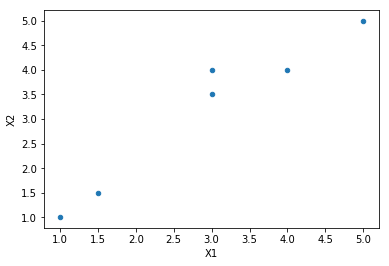

In [230]:
df.plot(kind="scatter", x='X1', y='X2')

In [254]:
def calDist(a,b):
    return math.sqrt(sum((np.array(a)-np.array(b))**2))

def calRandomCentroids(k, df):
    centroids = []
    for i in range(k):
        rand = random.randint(0,len(df)-1)
        randVal = tuple(df.loc[rand].values)
        while randVal in centroids:
            rand = random.randint(0,len(df)-1)
            randVal = tuple(df.loc[rand].values)
        else:
            centroids.append(randVal)
    return centroids       

def calNewCentroids(clusters):
    #{(3.0, 4.0): [(3.0, 4.0)], (4.0, 4.0): [(5.0, 5.0), (4.0, 4.0)], (3.0, 3.5): [(1.0, 1.0), (1.5, 1.5), (3.0, 3.5)]}
    newcentroids = []
    for k in clusters:
        sumc = 0
        for l in range(len(clusters[k])):
            sumc += df.loc[clusters[k][l]]
        cent = sumc/len(clusters[k])
        newcentroids.append(tuple(cent))
    return newcentroids

def makeClusters(k, df, centroids):
    clusters = {}
    for tup in centroids:
        clusters[tup] = []
    for i in range(len(df)):
        pointDists = {}
        for tup in centroids:
            dist = calDist(tuple(df.loc[i].values),tup)
            pointDists[dist] = tup
        ncp = pointDists.get(min(pointDists)) 
        clusters[ncp].append(i) #or i
    return clusters    
                  

def checkConvergence(k,oldcentroids,newcentroids):
    result = []
    for i in range(k):
        rs = calDist(oldcentroids[i],newcentroids[i])
        result.append(rs)
    print("convergence result is {}".format(result))
    count = 0
    for i in range(len(result)):
        if result[i] <= 0.5:
            count = count+1
    return True if count == len(result) else False       
    
    
    
def kMeans(k, df):
    
    centroids = calRandomCentroids(k, df)
    print("random centroids are {}".format(centroids))
    oldcentroids = centroids
    
    clusters = makeClusters(k, df, oldcentroids)
    print("first iter clusters are {}".format(clusters))   
    
    newcentroids = calNewCentroids(clusters)
    print("new centroids are {}".format(newcentroids))
    
    res = checkConvergence(k,oldcentroids,newcentroids)
    print(res)
    
    while res == False:
        oldcentroids = newcentroids
        clusters = makeClusters(k, df, oldcentroids)
        print("further iter clusters are {}".format(clusters))   
        newcentroids = calNewCentroids(clusters)
        res = checkConvergence(k,oldcentroids,newcentroids)
        print(res)
    else:
        print("Final clusterings are {}".format(clusters))    
    

kMeans(3, df)

random centroids are [(3.0, 4.0), (3.0, 3.5), (4.0, 4.0)]
first iter clusters are {(3.0, 4.0): [3], (3.0, 3.5): [0, 1, 5], (4.0, 4.0): [2, 4]}
new centroids are [(3.0, 4.0), (1.8333333333333333, 2.0), (4.5, 4.5)]
convergence result is [0.0, 1.90029237516523, 0.7071067811865476]
False
further iter clusters are {(3.0, 4.0): [3, 5], (1.8333333333333333, 2.0): [0, 1], (4.5, 4.5): [2, 4]}
convergence result is [0.25, 0.9501461875826149, 0.0]
False
further iter clusters are {(3.0, 3.75): [3, 5], (1.25, 1.25): [0, 1], (4.5, 4.5): [2, 4]}
convergence result is [0.0, 0.0, 0.0]
True
Final clusterings are {(3.0, 3.75): [3, 5], (1.25, 1.25): [0, 1], (4.5, 4.5): [2, 4]}
